In [1]:
# import librarys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing data 
df = pd.read_csv("movie_metadata.csv")
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


### EDA

In [3]:
# Find the shape of Data
df.shape

(5043, 28)

In [4]:
# Basic understand of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [5]:
# How many null values are in the data 
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Text(0.5,1,'Missing Values')

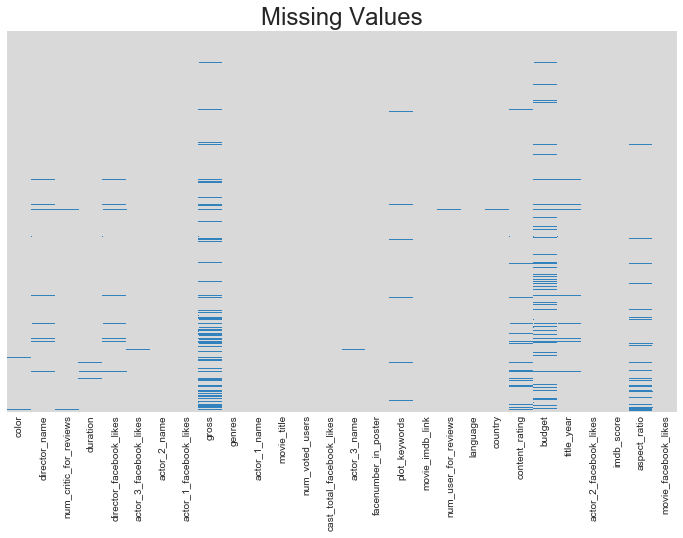

In [6]:
# plot of the null values 
fig, ax = plt.subplots(figsize = (12,7))
sns.set(font_scale = 2)
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = 'tab20c_r')
plt.title("Missing Values")

In [7]:
# drop the null values
df2 = df.dropna()
df2.shape

(3756, 28)

In [8]:
# basic stats of numeric columns
df2.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,167.378328,110.257987,807.336528,771.279553,7751.338658,5.261282e+07,1.058267e+05,11527.101970,1.377263,336.843184,4.623685e+07,2002.976571,2021.775825,6.465282,2.111014,9353.829340
std,123.452040,22.646717,3068.171683,1894.249869,15519.339621,7.031787e+07,1.520354e+05,19122.176905,2.041541,411.227368,2.260103e+08,9.888108,4544.908236,1.056247,0.353068,21462.889123
min,2.000000,37.000000,0.000000,0.000000,0.000000,1.620000e+02,9.100000e+01,0.000000,0.000000,4.000000,2.180000e+02,1927.000000,0.000000,1.600000,1.180000,0.000000
25%,77.000000,96.000000,11.000000,194.000000,745.000000,8.270233e+06,1.966700e+04,1919.750000,0.000000,110.000000,1.000000e+07,1999.000000,384.750000,5.900000,1.850000,0.000000
50%,138.500000,106.000000,64.000000,436.000000,1000.000000,3.009311e+07,5.397350e+04,4059.500000,1.000000,210.000000,2.500000e+07,2004.000000,685.500000,6.600000,2.350000,227.000000
75%,224.000000,120.000000,235.000000,691.000000,13000.000000,6.688194e+07,1.286020e+05,16240.000000,2.000000,398.250000,5.000000e+07,2010.000000,976.000000,7.200000,2.350000,11000.000000
max,813.000000,330.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.300000,16.000000,349000.000000


In [9]:
# last 20 years of movies count
df2.groupby(["title_year"]).title_year.count().tail(20)

title_year
1997.0    101
1998.0    115
1999.0    157
2000.0    159
2001.0    179
2002.0    190
2003.0    145
2004.0    181
2005.0    182
2006.0    189
2007.0    152
2008.0    182
2009.0    182
2010.0    168
2011.0    168
2012.0    158
2013.0    163
2014.0    145
2015.0    128
2016.0     59
Name: title_year, dtype: int64

In [10]:
# correlation of numeric variables 
corr = df2.corr()
corr

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.228631,0.175128,0.252782,0.165986,0.464187,0.592473,0.236533,-0.034365,0.563684,0.104717,0.420202,0.253125,0.347886,0.180230,0.705226
duration,0.228631,1.000000,0.180644,0.125797,0.083632,0.245726,0.339592,0.120179,0.026919,0.351595,0.068012,-0.130211,0.128935,0.366221,0.153027,0.215303
director_facebook_likes,0.175128,0.180644,1.000000,0.117405,0.089630,0.138351,0.299624,0.118547,-0.048067,0.217103,0.018167,-0.044656,0.116058,0.192314,0.037528,0.161962
actor_3_facebook_likes,0.252782,0.125797,0.117405,1.000000,0.252408,0.299864,0.267762,0.489795,0.106189,0.205343,0.039966,0.117475,0.553755,0.065544,0.046356,0.271508
actor_1_facebook_likes,0.165986,0.083632,0.089630,0.252408,1.000000,0.144010,0.179590,0.944813,0.057387,0.121935,0.016418,0.096194,0.391166,0.093597,0.056946,0.130300
gross,0.464187,0.245726,0.138351,0.299864,0.144010,1.000000,0.624949,0.235601,-0.032025,0.544674,0.099496,0.054808,0.252842,0.214740,0.063946,0.366933
num_voted_users,0.592473,0.339592,0.299624,0.267762,0.179590,0.624949,1.000000,0.249119,-0.032209,0.778881,0.065927,0.023687,0.244822,0.482430,0.084626,0.517751
cast_total_facebook_likes,0.236533,0.120179,0.118547,0.489795,0.944813,0.235601,0.249119,1.000000,0.080687,0.178675,0.028682,0.127045,0.642991,0.106803,0.068952,0.205564
facenumber_in_poster,-0.034365,0.026919,-0.048067,0.106189,0.057387,-0.032025,-0.032209,0.080687,1.000000,-0.080971,-0.021673,0.070093,0.073098,-0.065493,0.018988,0.015185
num_user_for_reviews,0.563684,0.351595,0.217103,0.205343,0.121935,0.544674,0.778881,0.178675,-0.080971,1.000000,0.070372,0.019470,0.187016,0.325003,0.098109,0.370465


Text(0.5,1,'Correlation')

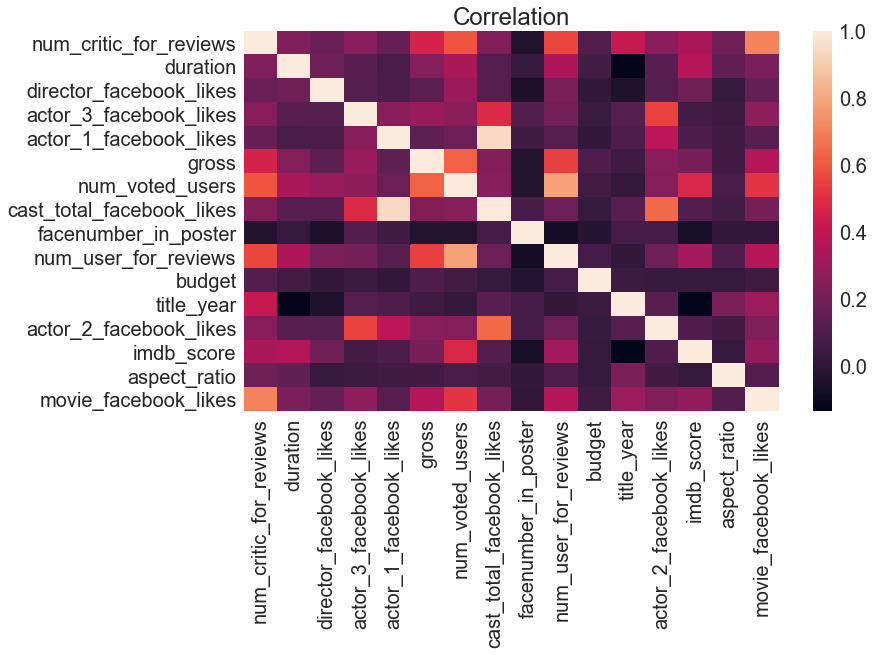

In [11]:
fig, ax = plt.subplots(figsize = (12,7))
sns.heatmap(corr)
ax.set_title("Correlation")

In [12]:
# correlation between gross and imdb_score
df2["gross"].corr(df2["imdb_score"])

0.2147397121760224

In [13]:
# mean of gross and imdb_score
print("Mean Gross Sales: ", df2.gross.mean())
print("Mean IMDB Rating: ", df2.imdb_score.mean())

Mean Gross Sales:  52612824.23748669
Mean IMDB Rating:  6.4652822151224525


#### Top and Bottem for gross sales

In [14]:
# Top
df2.loc[df2['gross'] == df2.gross.max(), ("movie_title",'director_name', "gross")]

,movie_title,director_name,gross
0,Avatar,James Cameron,760505847.0


In [15]:
#Bottem
df2.loc[df2['gross'] == df2.gross.min(), ("movie_title",'director_name', "gross")]

,movie_title,director_name,gross
3330,Skin Trade,Ekachai Uekrongtham,162.0


#### Top and Bottem for IMDB Score

In [16]:
# Top
df2.loc[df2['imdb_score'] == df2.imdb_score.max(), ("movie_title",'director_name', "imdb_score")]

,movie_title,director_name,imdb_score
1937,The Shawshank Redemption,Frank Darabont,9.3


In [17]:
# Bottem
df2.loc[df2['imdb_score'] == df2.imdb_score.min(), ("movie_title",'director_name', "imdb_score")]

,movie_title,director_name,imdb_score
2834,Justin Bieber: Never Say Never,Jon M. Chu,1.6


Histogram of gross sales and imdb score 
- x axis is hunders of million 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18627ef0>,
      dtype=object)

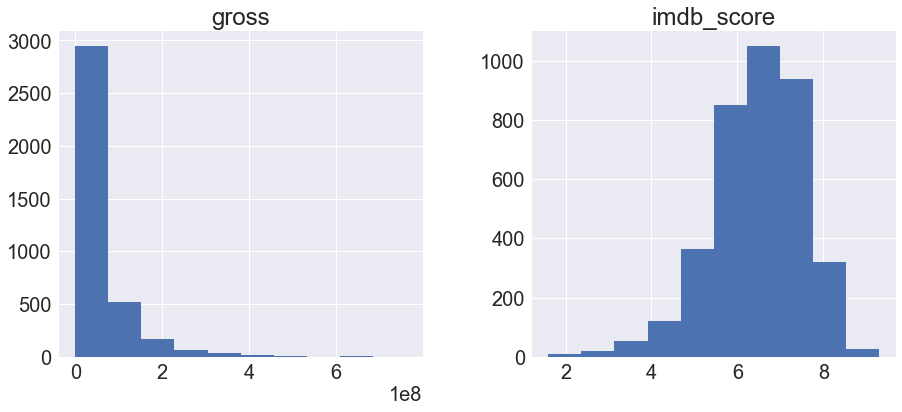

In [18]:
col = ['imdb_score', 'gross']
df2[col].hist(figsize=(15,6))

#### Scatter plot of Gross sales vs. IMDB Score

Text(0.5,1,'IMDB Rating vs. Gross Sales Revenue')

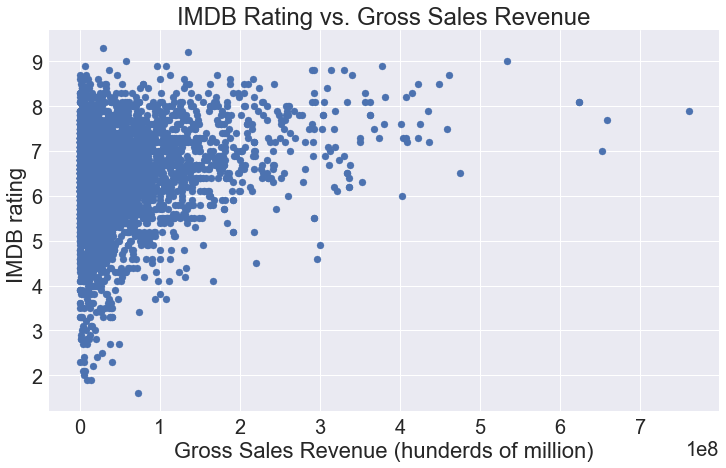

In [19]:
plt.figure(figsize=(12,7))
plt.scatter(df2["gross"], df2["imdb_score"])
plt.xlabel("Gross Sales Revenue (hunderds of million)")
plt.ylabel("IMDB rating ")
plt.title("IMDB Rating vs. Gross Sales Revenue")

In [20]:
# taking to columns for simple linear regression
df3 = df[["gross", "imdb_score"]]
df3.head()

,gross,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1
2,200074175.0,6.8
3,448130642.0,8.5
4,NaN,7.1


In [21]:
# counting nulls before and after droping Na's
print("Is ther an null values")
print(df3.isnull().sum())
df3.dropna(inplace = True)
print("-"*40)
print("Null values after drop")
print(df3.isnull().sum())

Is ther an null values
gross         884
imdb_score      0
dtype: int64
----------------------------------------
Null values after drop
gross         0
imdb_score    0
dtype: int64


# Problem 1

## A.

In [22]:
# see the break down of the test and train set
import numpy.random as rnd
def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_ind = shuffled_indices[:test_set_size]
    train_ind = shuffled_indices[test_set_size:]
    return data.iloc[train_ind], data.iloc[test_ind]

In [23]:
train_set, test_set = split_train_test(df3, 0.2)
print("Train: ", len(train_set), "Test: ",len(test_set))

Train:  3328 Test:  831


#### Run a simple linear regression model

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [25]:
x = np.c_[df3['gross']]
y = np.c_[df3['imdb_score']]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .20,
                                                    random_state = 1)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
t0, t1

(6.319469423982901, 3.2544884548484666e-09)

In [30]:
y_pred = model.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### Metrics to see how the model performed 

In [32]:
print("R squared: ", r2_score(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: ",mean_absolute_error(y_test, y_pred))
print("Model Predicting 53 million in Gross sales :", model.predict([[53000000]]))

R squared:  0.01713323961999702
MSE:  1.0711606888591172
RMSE:  1.034968931349689
MAE:  0.814088971829415
Model Predicting 53 million in Gross sales : [[6.49195731]]


#### Goddness of fit plot

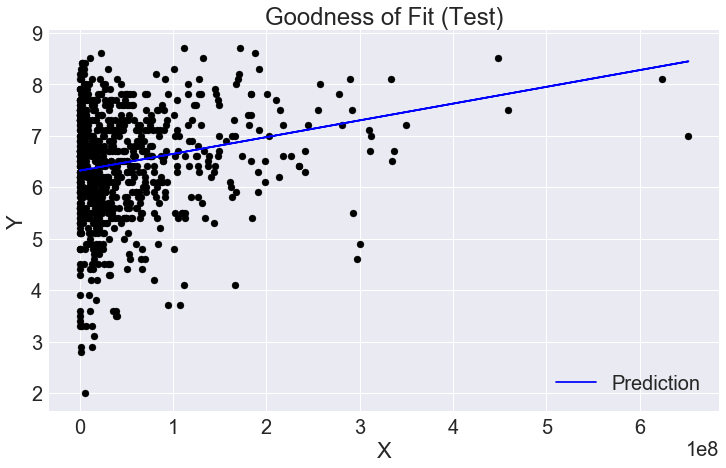

In [33]:
plt.figure(figsize = (12,7))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred,"b", label = "Prediction")
plt.title("Goodness of Fit (Test)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## B.

### Ridge

##### Conducted Ridge regression 

In [34]:
from sklearn.linear_model import Ridge

In [35]:
ridge_reg = Ridge(alpha = 10)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
rigt0, rigt1 = ridge_reg.intercept_, ridge_reg.coef_
rigt0, rigt1

(array([6.31946942]), array([[3.25448845e-09]]))

In [37]:
ridge_pred = ridge_reg.predict(x_test)

#### Metrics to see how the model performed

In [38]:
print("R squared: ", r2_score(y_test, ridge_pred))
print("MSE: ", mean_squared_error(y_test, ridge_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, ridge_pred)))
print("MAE: ",mean_absolute_error(y_test, ridge_pred))
print("Model Predicting 53 million in Gross sales :", ridge_reg.predict([[53000000]]))

R squared:  0.017133239619997243
MSE:  1.071160688859117
RMSE:  1.0349689313496888
MAE:  0.814088971829415
Model Predicting 53 million in Gross sales : [[6.49195731]]


### Lasso

#### Conducted Lasso regression 

In [39]:
from sklearn.linear_model import Lasso

In [40]:
lasso_reg = Lasso(alpha = 10)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [41]:
last0, last1 = lasso_reg.intercept_, lasso_reg.coef_
last0, last1

(array([6.31946953]), array([3.25448629e-09]))

In [42]:
las_pred = lasso_reg.predict(x_test)

#### Metrics to see how the model performed

In [43]:
print("R squared: ", r2_score(y_test, las_pred))
print("MSE: ", mean_squared_error(y_test, las_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, las_pred)))
print("MAE: ",mean_absolute_error(y_test, las_pred))
print("Model Predicting 53 million in Gross sales :", lasso_reg.predict([[53000000]]))

R squared:  0.01713325920260733
MSE:  1.071160667517341
RMSE:  1.0349689210393427
MAE:  0.8140889581494268
Model Predicting 53 million in Gross sales : [6.4919573]


#### Goodness of fit with all three regressions

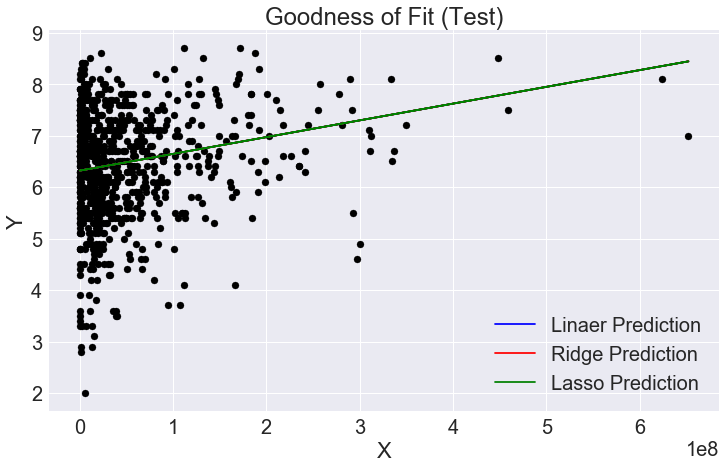

In [44]:
plt.figure(figsize = (12,7))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred,"b", label = "Linaer Prediction")
plt.plot(x_test, ridge_pred,"r", label = "Ridge Prediction")
plt.plot(x_test, las_pred,"g", label = "Lasso Prediction")
plt.title("Goodness of Fit (Test)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

As seen from the graph and the metrics used there wasn't much difference between Linear, Ridge, and Lasso if any at all. Ridge and Lasso had intercepts and coefficients that were slightly different than that of a linear regression. Which leads the metrics to show a very small difference when comparing the models. 

## C.

When lambda is zero the estimates produced will be equal to least squares or the linear regression estimates. The smaller the  lambda the more complex the model can be, which could lead to overfitting. The model won't be able to generalize the new data. The idea is to strike a balance between simplicity and complexity in your model when using lambda. 

## D.

### Linear Relationship 

Text(0.5,1,'IMDB Rating vs. Gross Sales Revenue')

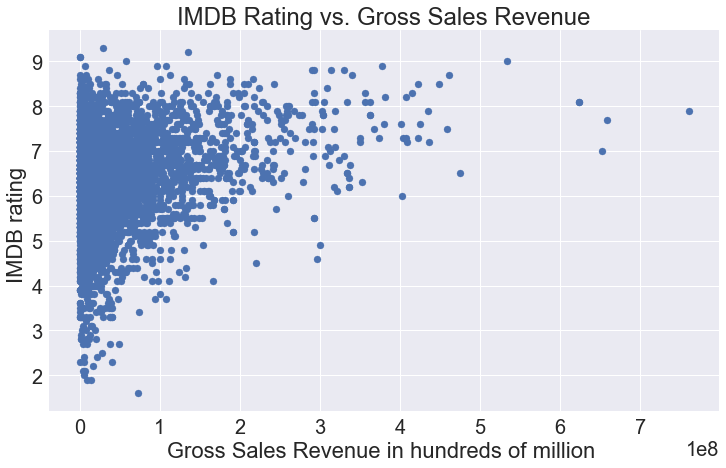

In [45]:
plt.figure(figsize=(12,7))
plt.scatter(df3["gross"], df3["imdb_score"])
plt.xlabel("Gross Sales Revenue in hundreds of million ")
plt.ylabel("IMDB rating ")
plt.title("IMDB Rating vs. Gross Sales Revenue")

As seen from the scatter plot above there is a slight linear relationship between Gross sales and IMDB rating. There seems to be a lot of movies that didn't have great sales and received an average IMDB rating. There is a small trend showing that as the gross sales increases the higher the IMDB rating seems to be. The linear relationship isn't perfect but there is a slight linear relationship. 

### Normality of Errors

In [46]:
residuals = y_pred - y_test

Text(0.5,1,'Residual Histogram')

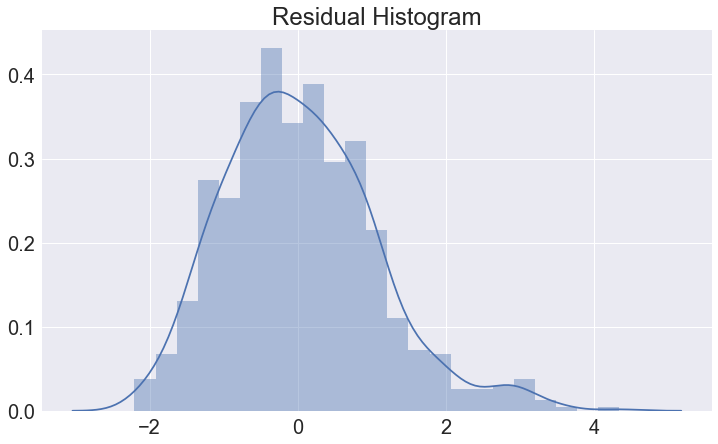

In [47]:
plt.figure(figsize = (12,7))
sns.distplot(residuals)
plt.title("Residual Histogram")

Based on the plot above the residuals are normally distributed around zero. The histogram may be a little positively skewed but not much.  I also know that a QQ plot will be another test to see the distribution of the residuals but I could not find away in python that worked for me.

### Multicollinearity

In simple linear regression multicollinearity is not a problem because we only have one independent variable. It should be tested in multiple linear regression. One way to test for multicollinearity is with correlation. If there is a correlation above .80 than there is multicollinearity in the regression model. Another way is to use Variance Inflation Factor (VIF). VIF indicates the degree in which the variance in the regression estimates are increased due to multicollinearity. If you get a value over 10 than multicollinearity is a problem.

### Homoscedasticity

Text(0,0.5,'Residual')

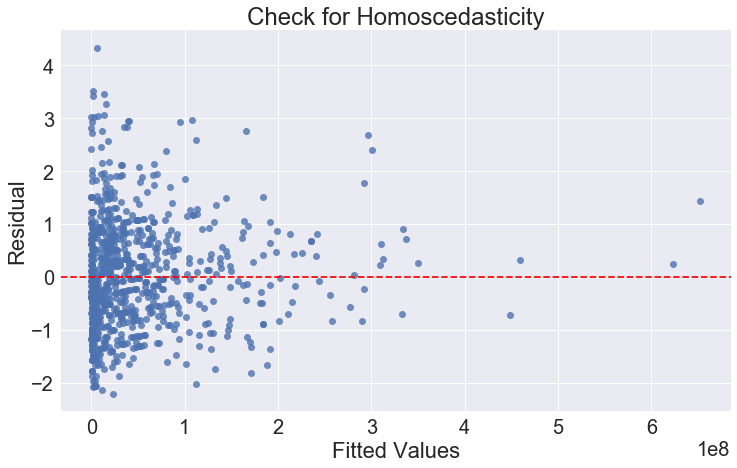

In [48]:
plt.figure(figsize = (12,7))
sns.regplot(y = residuals, x= x_test, fit_reg = False) 
plt.axhline(y=0, color = 'r', linestyle = '--')
plt.title('Check for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')

Based on the plot above the simple linear model has heteroscedasticity. This can be seen by the cone shape that is present in the plot above. When we test for homoscedasticity of error terms we are testing to determine whether a regression can have predictions that are consistent across all values of the fitted value. This shows that the results from the simple linear model should not be trusted.  As the values of x or the fitted value get smaller there is more variation in the predictions. One way to fix this would be to pick another independent variable. Since it is a simple linear regression that would be easy to do. Another way to fix this is to do a transformation like log. Another reason that there is a cone shape is that there were many points that had gross sales close to zero and not many points greater than 3 (300 million) in the data. 

## E.

#### Created new data set for multivariate linear regression 

In [49]:
df4 = df.dropna()

In [50]:
# compare shape
df.shape, df4.shape

((5043, 28), (3756, 28))

In [51]:
df4.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [52]:
# Number unique values in Language
df4.language.unique()

array(['English', 'Mandarin', 'Aboriginal', 'Spanish', 'French',
       'Filipino', 'Maya', 'Kazakh', 'Cantonese', 'Japanese', 'Aramaic',
       'Italian', 'Dutch', 'Dari', 'German', 'Mongolian', 'Thai',
       'Bosnian', 'Korean', 'Hungarian', 'Hindi', 'Danish', 'Portuguese',
       'Norwegian', 'Czech', 'Russian', 'None', 'Zulu', 'Hebrew',
       'Arabic', 'Vietnamese', 'Indonesian', 'Romanian', 'Persian'],
      dtype=object)

In [53]:
# Number unique values in country
df4.country.unique()

array(['USA', 'UK', 'New Zealand', 'Canada', 'Australia', 'Germany',
       'China', 'New Line', 'France', 'Japan', 'Spain', 'Hong Kong',
       'Czech Republic', 'Peru', 'South Korea', 'Aruba', 'Denmark',
       'Ireland', 'South Africa', 'Italy', 'Romania', 'Chile',
       'Netherlands', 'Hungary', 'Russia', 'Belgium', 'Greece', 'Taiwan',
       'Official site', 'Thailand', 'Iran', 'West Germany', 'Georgia',
       'India', 'Mexico', 'Brazil', 'Finland', 'Norway', 'Iceland',
       'Argentina', 'Colombia', 'Poland', 'Israel', 'Indonesia',
       'Afghanistan'], dtype=object)

In [54]:
# Number unique values in color
df4.color.unique()

array(['Color', ' Black and White'], dtype=object)

In [55]:
# Number unique values in content rating
df4.content_rating.unique()

array(['PG-13', 'PG', 'G', 'R', 'Approved', 'NC-17', 'X', 'Not Rated',
       'Unrated', 'M', 'GP', 'Passed'], dtype=object)

I decided to drop all categorical variables in the data set because at this time I don’t know how to use dummy variables in feature selection. Couldn’t find a way to do this online.  

In [56]:
df5 = df4.drop(['director_name', 'actor_2_name','actor_1_name', 
                'movie_title', 'plot_keywords', 'movie_imdb_link', 'actor_3_name','genres',
                'country','language','content_rating','color','title_year' ],axis = 1)

In [57]:
# new dataset
df5.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,936.0,7.9,1.78,33000
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,5000.0,7.1,2.35,0
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,393.0,6.8,2.35,85000
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,23000.0,8.5,2.35,164000
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,632.0,6.6,2.35,24000


In [58]:
df5.shape

(3756, 15)

##### Feature selection with Recursive feature Elimination 

In [59]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

In [60]:
x = df5.drop('imdb_score', axis = 1)
y = df5[['imdb_score']]

#### Created train, validation and test sets

In [61]:
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, 
                                                    random_state=1)
x_train, x_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.2, 
                                                   random_state=1)

In [62]:
x_train.shape, x_val.shape, x_test.shape

((2403, 14), (601, 14), (752, 14))

#### Scaled all data for x

In [63]:
### Scaling x_train
names = x_train.columns
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train, columns=names)
x_train.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.668967,1.968996,-0.264594,-0.081893,-0.462600,0.461775,2.664835,-0.438184,-0.191814,1.845889,-0.202644,-0.298944,-0.669514,0.409434
1,0.115756,-0.124331,-0.210075,-0.347751,-0.462600,-0.525720,-0.460735,-0.545421,0.292355,0.115666,-0.241425,-0.375506,-0.669514,-0.444742
2,-0.982650,-0.658797,-0.264594,-0.060352,-0.543612,-0.213384,-0.609381,-0.419579,-0.191814,-0.623025,-0.073115,-0.260247,-0.669514,-0.414466
3,-1.167053,-0.124331,-0.256517,-0.377228,-0.602183,-0.637578,-0.691525,-0.648743,-0.675983,-0.598236,-0.316902,-0.378419,-1.892678,-0.423103
4,-0.710053,-0.703336,-0.135701,0.002569,-0.300575,0.078679,-0.116331,-0.330466,-0.191814,-0.347875,0.041677,-0.261079,0.604615,-0.444742


In [64]:
### Scaling x_val
names = x_val.columns
scaler = StandardScaler()
x_val = scaler.fit_transform(x_val)
x_val = pd.DataFrame(x_val, columns=names)
x_val.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,-0.152326,0.154117,-0.220458,-0.058190,0.464344,0.413572,-0.115864,0.374657,0.297158,0.025262,-0.094607,-0.262209,0.890767,-0.476329
1,-1.247107,-1.270874,-0.105053,-0.263990,-0.695866,-0.699294,-0.643040,-0.681775,-0.147101,-0.718832,-0.116486,-0.420131,-0.940494,-0.451684
2,1.063140,-0.700877,-0.259037,-0.376989,-0.663573,-0.562391,-0.171363,-0.682963,0.297158,-0.254627,-0.076542,-0.390130,0.890767,0.046908
3,-1.238486,6.464792,-0.249392,-0.283642,-0.656934,-0.615588,-0.529034,-0.634505,-0.591359,-0.209116,-0.066506,-0.328930,-0.940494,-0.476329
4,1.821728,-0.008739,-0.157268,-0.084393,2.576925,-0.631727,0.181557,1.731349,-0.591359,-0.147678,-0.109661,-0.017405,-1.636374,0.831764


In [65]:
### Scaling x_test
names = x_test.columns
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test, columns=names)
x_test.head()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes
0,0.613396,-0.379888,0.031083,-0.250030,-0.294983,-0.567379,-0.188833,-0.361277,0.365441,-0.268438,-0.372818,-0.327844,0.906423,-0.391195
1,-0.643023,-0.287061,-0.260141,-0.327033,-0.295736,-0.704641,-0.568005,-0.377847,-0.765471,-0.467463,-0.628469,-0.360199,-0.973314,-0.349998
2,-0.410946,1.940794,-0.253081,-0.259166,-0.292208,-0.126547,-0.238111,-0.360418,-0.765471,-0.071839,-0.611425,-0.402236,0.342502,-0.391195
3,-0.322916,0.548385,-0.218664,4.418016,0.627221,-0.587808,-0.391586,1.398485,0.365441,-0.360669,-0.244993,3.350225,0.906423,-0.391195
4,-1.283237,-0.890438,-0.256906,-0.163456,-0.300413,-0.715672,-0.681261,-0.333470,0.930897,-0.780564,-0.705164,-0.347716,-0.973314,-0.387652


In [66]:
### Runing Recursive Feature Elimination 
model2 = LinearRegression()
rfe = RFE(model2, n_features_to_select=7 )
rfe = rfe.fit(x_train, y_train)

In [67]:
# Rnking features
selected_features = pd.DataFrame({'Feature':list(x.columns),'Ranking':rfe.ranking_})
selected_features.sort_values(by='Ranking')

,Feature,Ranking
1,duration,1
3,actor_3_facebook_likes,1
4,actor_1_facebook_likes,1
6,num_voted_users,1
7,cast_total_facebook_likes,1
9,num_user_for_reviews,1
11,actor_2_facebook_likes,1
0,num_critic_for_reviews,2
5,gross,3
13,movie_facebook_likes,4


##### Taking features that were selected

In [68]:
x_train = x_train[['duration','actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                  'cast_total_facebook_likes',
                   'num_user_for_reviews','actor_2_facebook_likes']]

In [69]:
x_val = x_val[['duration','actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                  'cast_total_facebook_likes',
               'num_user_for_reviews','actor_2_facebook_likes']]

In [70]:
x_test = x_test[['duration','actor_3_facebook_likes','actor_1_facebook_likes','num_voted_users',
                  'cast_total_facebook_likes',
                 'num_user_for_reviews','actor_2_facebook_likes']]

#### Running Linear Regression

In [71]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
model2.intercept_,model2.coef_

(array([6.45813566]),
 array([[ 0.25554174,  0.23899235,  1.45487168,  0.57950283, -1.94881231,
         -0.19527531,  0.57021478]]))

In [73]:
y_pred_val = model2.predict(x_val)

In [74]:
### Metrics
print("R squared: ", r2_score(y_val, y_pred_val))
print("MSE: ", mean_squared_error(y_val, y_pred_val))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, y_pred_val)))
print("MAE: ",mean_absolute_error(y_val, y_pred_val))

R squared:  0.3270029752986977
MSE:  0.7715499740699578
RMSE:  0.8783791744286507
MAE:  0.6987424901775673


### Ridge

#### Conducting Ridge regression

In [75]:
ridge_reg2 = Ridge(alpha = 100)
ridge_reg2.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [76]:
ridge_reg2.intercept_, ridge_reg2.coef_

(array([6.45813566]),
 array([[ 0.24253224, -0.051933  ,  0.07511068,  0.51355333, -0.09940003,
         -0.14202163,  0.03255479]]))

In [77]:
ridge2_pred = ridge_reg2.predict(x_val)

In [78]:
### Metrics
print("R squared: ", r2_score(y_val, ridge2_pred))
print("MSE: ", mean_squared_error(y_val, ridge2_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, ridge2_pred)))
print("MAE: ",mean_absolute_error(y_val, ridge2_pred))

R squared:  0.31142761543843034
MSE:  0.7894061726195029
RMSE:  0.8884853249319894
MAE:  0.7040135766857608


## Lasso 

#### Conducted Lasso Regression

In [79]:
lasso2_reg = Lasso(alpha =1e-2)
lasso2_reg.fit(x_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
lasso2_reg.intercept_, lasso2_reg.coef_

(array([6.45813566]),
 array([ 0.2389022 , -0.06090759,  0.        ,  0.5322832 , -0.        ,
        -0.15153125, -0.        ]))

In [81]:
lasso2_pred = lasso2_reg.predict(x_val)

In [82]:
### Metrics
print("R squared: ", r2_score(y_val, lasso2_pred))
print("MSE: ", mean_squared_error(y_val, lasso2_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_val, lasso2_pred)))
print("MAE: ",mean_absolute_error(y_val,lasso2_pred))

R squared:  0.3105339982826838
MSE:  0.7904306500956859
RMSE:  0.889061668331104
MAE:  0.7036226610869436


After looking at all three models and how they proformed on the validation set  the linear regression model seemed to do the best with the highest R squared and the lowest error metrics. I will use the linear regression model on the test data 

**Adding the validation set back to the training set to train the linear regression model on all the training data before it is tested on the test set**

In [83]:
new_x_train = x_train.append(x_val)
new_y_train = y_train.append(y_val)

In [84]:
new_x_train.shape, new_y_train.shape

((3004, 7), (3004, 1))

In [85]:
model2 = LinearRegression()
model2.fit(new_x_train, new_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
model2.intercept_,model2.coef_

(array([6.46934088]),
 array([[ 0.2634569 ,  0.23593272,  1.40365499,  0.58159595, -1.89470617,
         -0.19160063,  0.55953274]]))

### Test Data

In [87]:
y_test_pred = model2.predict(x_test)

In [88]:
### Metrics
print("R squared: ", r2_score(y_test,y_test_pred))
print("MSE: ", mean_squared_error(y_test, y_test_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE: ",mean_absolute_error(y_test,y_test_pred))

R squared:  0.17413072392615836
MSE:  0.9871327153900344
RMSE:  0.9935455275879583
MAE:  0.7356705338284566


This linear model did not do very good on the test data. The R squared was significantly lower with the test set than the validation set. The MSE and RMSE was much higher with the test set. The only metric that didn't move to much was MAE which moved only a couple of points higher from the validation set to the test set. A better choice could have been the Ridge or Lasso models because these models are more generalized models.  

## 2.

### Batch Gradient Descent

Batch Gradient Descent calculates the error for each observation in the training data. If there is a lot of data in the data set than batch gradient Descent becomes very costly because it has to go through the whole dataset. Batch Gradient Descent will do less walking around the minimum than min-batch and Stochastic but it will take longer to get to the minimum.

### Mini-Batch Gradient Descent

In mini-batch gradient descent we first divide the training data into small random batchs. The batchs are between 30-500 depending on the size of the problem. Next we would perform one update per mini-batch. Mini-batch will walk around a bit closer to the minimum than Stochastic Gradient Descent which I will cover next. 

### Stochastic Gradient Descent 


Stochastic Gradient Descent picks a instance at random in the training data at every step and takes the gradients based on the single instance. This will make the algorithm much faster and easier to train on large data sets. The cost function will bounce around only getting smaller on average. It will find the minimum over time but once it gets there it will bounce around never settling down. One way to have it settle is to gradually reduce the learning rate. 

### Mathematical Notations 
**from:** https://www.hackerearth.com/blog/machine-learning/3-types-gradient-descent-algorithms-small-large-data-sets/

Mathematical notations can be found at this link or on the last page

## Other Optimization Algorithms

### Adagrad

Adagrad adapts the learning rate to the parameters. Smaller updates are performed on parameters associated with frequently occurring features. Larger updates happen on parameters associated with infrequent features. Adagrad is suited to work with sparse data.  Basically Adagrad uses different learning rates for every parameter at every step.

### Adadelta

Adadelta is just an extension of Adagrad. Instead of taking all the past squared gradients it only takes the accumulated past gradients from some fixed size. The difference between Adagrad and Adadelta is that Adadelta takes into account the scale learning rate based on the historical gradient for a recent window not like Adagrad which takes in the whole history.

### Adaptive Moment Estimation (Adam)

Adam is a method that computes adaptive learning rates for each parameter, which means Adam finds individual learning rates for each parameter. Adam uses the squared gradients to scale the learning rate and also finds a moving average of the gradient instead of gradient itself. It sounds like Adam uses momentum, but in Adam the ball is heavy and has friction when rolling down the hill. This leads Adam to prefer a flat minima in the error surface. 

## Stochastic Gradient Descent

![](sdg.png)

## Batch Gradient Descent

![](Batch.png)

## Mini-Batch Gradient Descent

![](min.png)